<a href="https://colab.research.google.com/github/jjyjung/ai/blob/gh-pages/05_weld_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')   # google drive를 google colab에 연결. 처음 실행 시, 인증 필요

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
## 필요한 패키지 불러오기
import numpy as np
import pandas as pd
import sklearn.metrics as metric
import matplotlib.pyplot as plt
from sklearn import preprocessing
from pandas import read_excel

dir = "/content/gdrive/My Drive/Colab Notebooks/kamp/05. Dataset_Welding/"  ### [중요!!] Colab의 경우, 파일을 저장한 위치를 기록하시오.

##pandas의 read_excel함수를 사용하여 데이터 불러옴, 또한 index_col = “열 이름” 을 사용하여 인덱스 열 설정
welding_data = pd.read_excel(dir + "/dataset/Welding Data Set_01.xlsx", index_col ="idx")
welding_data.head()

,Machine_Name,Item No,working time,Thickness 1(mm),Thickness 2(mm),weld force(bar),weld current(kA),weld Voltage(v),weld time(ms)
idx,,,,,,,,,
1,Spot-01,65235-25800,2020-03-24,0.7,0.7,2.33,14.57,2.701,72.0
2,Spot-01,65235-25800,2020-03-24,0.7,0.7,2.36,14.57,2.701,72.0
3,Spot-01,65235-25800,2020-03-24,0.7,0.7,2.37,14.54,2.703,71.0
4,Spot-01,65235-25800,2020-03-24,0.7,0.7,2.37,14.54,2.703,72.0
5,Spot-01,65235-25800,2020-03-24,0.7,0.7,2.36,14.56,2.704,72.0


In [4]:
welding_data.describe()  #결과는 아래에서 확인 가능하다.

,Thickness 1(mm),Thickness 2(mm),weld force(bar),weld current(kA),weld Voltage(v),weld time(ms)
count,11939.0,11939.0,11939.000000,11939.000000,11939.000000,11939.000000
mean,0.7,0.7,2.787925,14.711208,2.704223,71.724123
std,0.0,0.0,1.455966,0.099000,0.024700,0.632049
min,0.7,0.7,1.740000,14.520000,2.464000,70.000000
25%,0.7,0.7,2.310000,14.610000,2.699000,71.000000
50%,0.7,0.7,2.340000,14.730000,2.702000,72.000000
75%,0.7,0.7,2.370000,14.750000,2.706000,72.000000
max,0.7,0.7,10.540000,15.070000,2.861000,73.000000


In [5]:
## 용접기 데이터에서 필요없는 부분(생산품목, 작업시간, 소재두께)들을 제외
new_welding_data = welding_data.iloc[:, 5:]
new_welding_data.head()  #결과는 아래에서 확인 가능하다.

,weld force(bar),weld current(kA),weld Voltage(v),weld time(ms)
idx,,,,
1,2.33,14.57,2.701,72.0
2,2.36,14.57,2.701,72.0
3,2.37,14.54,2.703,71.0
4,2.37,14.54,2.703,72.0
5,2.36,14.56,2.704,72.0


In [6]:
## sklearn의 preprocessing모듈에 들어있는 MinMaxScaler함수를 이용해 정규화 적용
scaler = preprocessing.MinMaxScaler()
scaler.fit(new_welding_data)
scaled_data = scaler.transform(new_welding_data)
scaled_data

array([[0.06704545, 0.09090909, 0.59697733, 0.66666667],
       [0.07045455, 0.09090909, 0.59697733, 0.66666667],
       [0.07159091, 0.03636364, 0.60201511, 0.33333333],
       ...,
       [0.07159091, 0.14545455, 0.62468514, 0.33333333],
       [0.06931818, 0.01818182, 0.62468514, 0.33333333],
       [0.06931818, 0.01818182, 0.62468514, 0.33333333]])

In [7]:
X_train, X_test = train_test_split(scaled_data, test_size=0.2, random_state=42)
print(scaled_data.shape)
print(X_train.shape)
print(X_test.shape)

(11939, 4)
(9551, 4)
(2388, 4)


In [16]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential  # 모듈(변수나 함수를 포함)만 불러오기
from tensorflow.keras.layers import Dense, GaussianNoise


# 오토인코더 모델 정의
input_dim = len(X_train[0])
hidden_dim = 3
encoding_dim = 2  # 압축된 표현의 차원

# # 모델 구조 정의하기
# (1) AutoEncoder
# model = Sequential()
# model.add(Dense(encoding_dim, input_dim=input_dim,
#                 activation='sigmoid'))            # Encoder 4 -> 2개
# model.add(Dense(input_dim, activation='linear')), # Decoder 2 -> 4개,

# (2) Stacked AutoEncoder (SAE)
# model = Sequential()
# model.add(Dense(hidden_dim, input_dim=input_dim,
#                 activation='sigmoid'))              # Encoder 4 -> 3개
# model.add(Dense(encoding_dim, activation='sigmoid')) # Encoder 3 -> 2개
# model.add(Dense(hidden_dim, activation='linear'))   # Decoder 2 -> 3개
# model.add(Dense(input_dim, activation='linear'))    # Decoder 3 -> 4개

# (3) Denoising AutoEncoder (DAE)
model = Sequential()
model.add(GaussianNoise(0.5, input_dim=input_dim))   # Noise 추가 (평균 0, 표준편차 0.5)
model.add(Dense(hidden_dim, activation='sigmoid'))   # Encoder 4 -> 3개
model.add(Dense(encoding_dim, activation='sigmoid')) # Encoder 3 -> 2개
model.add(Dense(hidden_dim, activation='linear'))    # Decoder 2 -> 3개
model.add(Dense(input_dim, activation='linear'))     # Decoder 3 -> 4개

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gaussian_noise (GaussianNo  (None, 4)                 0         
 ise)                                                            
                                                                 
 dense_7 (Dense)             (None, 3)                 15        
                                                                 
 dense_8 (Dense)             (None, 2)                 8         
                                                                 
 dense_9 (Dense)             (None, 3)                 9         
                                                                 
 dense_10 (Dense)            (None, 4)                 16        
                                                                 
Total params: 48 (192.00 Byte)
Trainable params: 48 (192.00 Byte)
Non-trainable params: 0 (0.00 Byte)
__________________

In [18]:
# 오토인코더 모델 학습
hist = model.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/50
299/299 [==============================] - 2s 3ms/step - loss: 0.1107 - val_loss: 0.0263
Epoch 2/50
299/299 [==============================] - 1s 3ms/step - loss: 0.0273 - val_loss: 0.0257
Epoch 3/50
299/299 [==============================] - 1s 2ms/step - loss: 0.0270 - val_loss: 0.0254
Epoch 4/50
299/299 [==============================] - 1s 3ms/step - loss: 0.0267 - val_loss: 0.0250
Epoch 5/50
299/299 [==============================] - 1s 3ms/step - loss: 0.0264 - val_loss: 0.0246
Epoch 6/50
299/299 [==============================] - 1s 3ms/step - loss: 0.0261 - val_loss: 0.0242
Epoch 7/50
299/299 [==============================] - 1s 3ms/step - loss: 0.0258 - val_loss: 0.0237
Epoch 8/50
299/299 [==============================] - 1s 4ms/step - loss: 0.0257 - val_loss: 0.0234
Epoch 9/50
299/299 [==============================] - 1s 4ms/step - loss: 0.0255 - val_loss: 0.0230
Epoch 10/50
299/299 [==============================] - 1s 4ms/step - loss: 0.0254 - val_loss: 0.0227

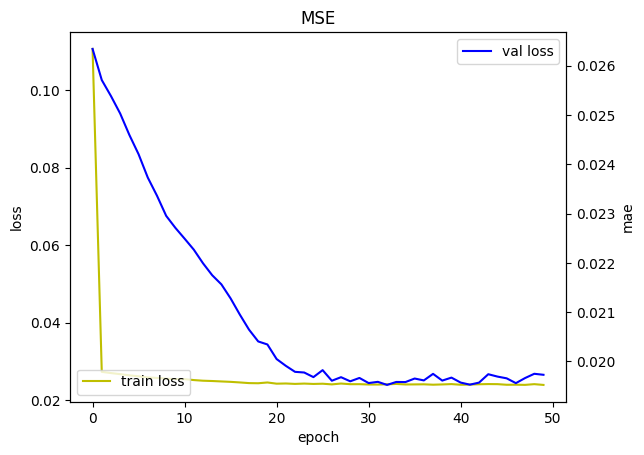

In [19]:
def loss_graph():
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()

    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    acc_ax.plot(hist.history['val_loss'], 'b', label='val loss')

    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('mae')

    loss_ax.legend(loc='lower left')
    acc_ax.legend(loc='upper right')

    plt.title("MSE")
    plt.show()

loss_graph()

In [23]:
# 학습된 오토인코더를 사용하여 이상치 검출
reconstructed_data = model.predict(scaled_data)
mse = np.mean(np.power(scaled_data - reconstructed_data, 2), axis=1)
threshold = np.mean(mse) + 4 * np.std(mse)  # 임계값 설정
print("Threshold :", threshold)  #아래에서 확인 가능

# 이상치 여부 확인
outlier = list(mse >= threshold)
outlier.count(True)

374/374 [==============================] - 1s 2ms/step
Threshold : 0.13325100042967825


112

In [24]:
outlier_idx = [index for index, value in enumerate(outlier) if value]
outlier_idx

[1877,
 1878,
 1879,
 1880,
 1881,
 1882,
 1883,
 1884,
 1885,
 1886,
 1887,
 1888,
 1889,
 1890,
 1892,
 1894,
 2010,
 2011,
 2072,
 2119,
 2120,
 2132,
 2133,
 2136,
 2148,
 2149,
 2161,
 2162,
 4691,
 4692,
 4693,
 4694,
 4695,
 4696,
 4697,
 4698,
 4699,
 4700,
 4701,
 4702,
 4703,
 4704,
 4706,
 4708,
 4824,
 4825,
 4886,
 4933,
 4934,
 4946,
 4947,
 4950,
 4962,
 4963,
 4975,
 4976,
 7801,
 7802,
 7803,
 7804,
 7805,
 7806,
 7807,
 7808,
 7809,
 7810,
 7811,
 7812,
 7813,
 7814,
 7816,
 7818,
 7934,
 7935,
 7996,
 8043,
 8044,
 8056,
 8057,
 8060,
 8072,
 8073,
 8085,
 8086,
 10877,
 10878,
 10879,
 10880,
 10881,
 10882,
 10883,
 10884,
 10885,
 10886,
 10887,
 10888,
 10889,
 10890,
 10892,
 10894,
 11010,
 11011,
 11072,
 11119,
 11120,
 11132,
 11133,
 11136,
 11148,
 11149,
 11161,
 11162]

In [25]:
str = '{}'.format(outlier_idx)
str

'[1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1892, 1894, 2010, 2011, 2072, 2119, 2120, 2132, 2133, 2136, 2148, 2149, 2161, 2162, 4691, 4692, 4693, 4694, 4695, 4696, 4697, 4698, 4699, 4700, 4701, 4702, 4703, 4704, 4706, 4708, 4824, 4825, 4886, 4933, 4934, 4946, 4947, 4950, 4962, 4963, 4975, 4976, 7801, 7802, 7803, 7804, 7805, 7806, 7807, 7808, 7809, 7810, 7811, 7812, 7813, 7814, 7816, 7818, 7934, 7935, 7996, 8043, 8044, 8056, 8057, 8060, 8072, 8073, 8085, 8086, 10877, 10878, 10879, 10880, 10881, 10882, 10883, 10884, 10885, 10886, 10887, 10888, 10889, 10890, 10892, 10894, 11010, 11011, 11072, 11119, 11120, 11132, 11133, 11136, 11148, 11149, 11161, 11162]'